# Section 1: CNN Model Training
Purpose: This section is dedicated to training a custom CNN (Convolutional Neural Network) model using a provided dataset containing artist images.

## Components:

### Custom CNN Model:
It includes the definition of a custom CNN architecture tailored for the task of artist classification or any specific task related to the images.
###Dataset Preparation:
The code includes the preparation and loading of the artist images dataset using PyTorch's ImageFolder and DataLoader.
### Training Loop:
 It encompasses the training loop where the model is trained using the dataset. This involves iterating through batches of images, forward passes, computing loss, backpropagation, and updating model weights using an optimizer.
# Section 2: Style Transfer Algorithm
Purpose: This section focuses on applying a style transfer algorithm to generate stylized images using the trained CNN model and a style image.

## Components:

### Trained CNN Model:
The previously trained custom CNN model is utilized for feature extraction.
### Style Image Loading:
A style image is loaded to define the artistic style that will be transferred to another image.
### Style Transfer Implementation:
 The code includes an algorithm or method for style transfer. It involves using the features extracted from the CNN model to iteratively optimize an input image to minimize content and style losses.
### Optimization Process:
This part involves an optimization loop that updates the generated image to minimize both content and style losses, resulting in a final stylized image that combines the content of one image with the style of another.
## Note:
Both sections operate independently but might share the same CNN model or some components.
The first section trains a CNN model for a specific task using an artist image dataset.
The second section utilizes the trained model's features for style transfer, merging the content from one image with the artistic style from another.
The code might save the trained model weights and/or the stylized images generated through style transfer.

# Section 1 (CNN training)

## Dataset Description:
###Dataset Name:
Open Source Artist Paintings Dataset

###Artists Included:

### Vincent van Gogh:
Known for his distinctive post-impressionist style, vibrant colors, and bold brushwork.
### Henri Matisse:
 Known for his use of color and fluid shapes, a prominent figure in the Fauvism movement.
### Pierre-Auguste Renoir:
Known for his impressionist paintings, often depicting people, nature, and social scenes.

##Dataset Content:

The dataset contains images of paintings created by these three artists, specifically curated for machine learning tasks.
Each artist's section in the dataset includes various paintings showcasing their unique styles, techniques, and subjects.
The images are typically stored in standard formats like JPEG, PNG, or TIFF.

##Image Characteristics:

###Artistic Styles:
Each artist's paintings exhibit distinctive artistic styles, brush strokes, color palettes, and subjects.
Subjects and Themes: Paintings might depict various subjects, including landscapes, portraits, still life, and other genres popular among the artists.
### Quality and Resolution:
 Image qualities may vary in terms of resolution, clarity, and size due to diverse sources and image acquisition processes.

In [1]:
!gdown 1QyEJVNDpGLCYKvqcXioH_h_6d-5NTODb #drive id to download dataset link also available in readme file

Downloading...
From: https://drive.google.com/uc?id=1QyEJVNDpGLCYKvqcXioH_h_6d-5NTODb
To: /content/Archive.zip
100% 2.76G/2.76G [00:28<00:00, 97.1MB/s]


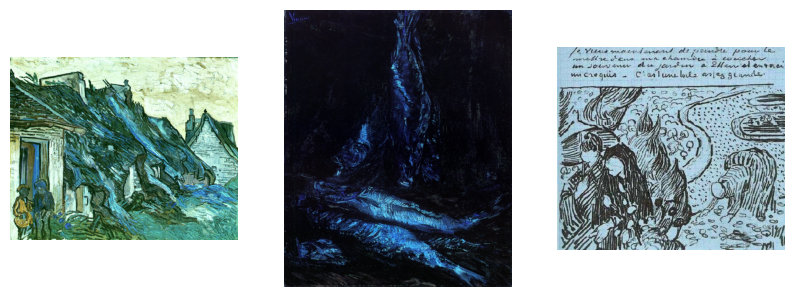

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

path = '/content/Archive/training/x/VanGogh'

# Get a list of all image files in the folder
images = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Select three random images
random_images = random.sample(images, 3)

# Display the selected images in a grid
plt.figure(figsize=(10, 5))
for i in range(len(random_images)):
    plt.subplot(1, len(random_images), i+1)
    img = cv2.imread(random_images[i])
    plt.imshow(img)
    plt.axis('off')

plt.show()


In [ ]:
!unzip /content/Archive.zip # unziping dataset

###training section

In [5]:
import torch
import torchvision
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim

# Define data directory
data_dir = '/content/Archive/training/x'  # Update with your dataset path




dataset = datasets.ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((512,512)),transforms.ToTensor()
]))




In [6]:
# import random
# # Generate a list of numbers from 1 to n
# label_list = list(range(0, 20))

# # Shuffle the list using random.shuffle()
# random.shuffle(label_list)
# count=0
# dataset=[[i,j] for  i ,j in dataset]
# for i in range(len(dataset)):
#   dataset[i][1]=label_list[count]
#   count+=1
#   if(count==20):
#     count=0;

In [7]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 8
val_size = 100
train_size = len(dataset) - val_size
train_data=[]
val_data=[]
count=0
import random

# Define the value of 'n'
n = len(dataset)  # Change this to your desired value

# Generate a list of numbers from 1 to n
numbers_list = list(range(0, n))

# Shuffle the list using random.shuffle()
random.shuffle(numbers_list)

# Display the shuffled list
print(numbers_list)

for i in numbers_list:
  if(count<val_size):
    count+=1
    val_data.append(dataset[i])
  else:
    train_data.append(dataset[i])


#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = False)
val_dl = DataLoader(val_data, batch_size*2, shuffle = False)

[246, 294, 282, 502, 1110, 1189, 84, 1177, 146, 478, 1087, 968, 656, 56, 224, 143, 668, 790, 455, 737, 86, 415, 392, 651, 934, 572, 137, 777, 406, 407, 954, 133, 140, 750, 26, 770, 1064, 702, 1153, 1002, 19, 338, 983, 427, 201, 733, 296, 79, 779, 1173, 98, 772, 971, 784, 1191, 1093, 520, 984, 506, 438, 123, 508, 993, 60, 731, 735, 447, 277, 175, 356, 738, 99, 995, 266, 342, 678, 897, 716, 806, 677, 778, 587, 814, 228, 827, 322, 429, 799, 736, 46, 81, 823, 170, 889, 1180, 357, 887, 172, 522, 144, 305, 204, 206, 250, 106, 929, 658, 157, 1193, 816, 1175, 507, 432, 1169, 430, 637, 424, 213, 715, 101, 451, 323, 203, 1042, 1050, 695, 673, 486, 911, 439, 921, 693, 384, 765, 42, 1164, 829, 207, 591, 860, 335, 589, 594, 556, 726, 395, 561, 467, 634, 841, 218, 932, 400, 39, 836, 769, 1085, 1094, 230, 528, 1178, 753, 132, 1060, 947, 974, 850, 396, 543, 1034, 685, 1035, 178, 518, 603, 519, 648, 946, 902, 727, 25, 394, 1160, 797, 113, 445, 869, 877, 525, 639, 859, 121, 16, 1108, 422, 512, 803, 382,

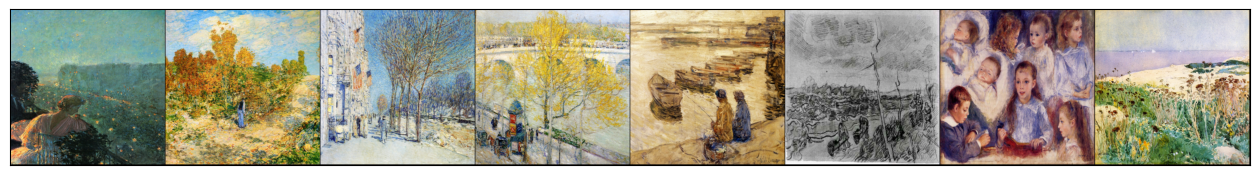

In [8]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break

show_batch(train_dl)

In [9]:
## base class for architecture
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        # print("jere")
        images, labels = images.to(device), labels.to(device)
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        # print(labels)
        images, labels = images.to(device), labels.to(device)
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [10]:
# accuracy and fit data and evaluate fucntion
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):

    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):

        model.train()
        train_losses = []

        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [14]:
#architecitiure class
import torch
import torch.nn as nn

# Define the CNN architecture
class SimpleCNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64,128 , kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            # nn.MaxPool2d(2,2),
            nn.Conv2d(128,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256, 384, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(384,384, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.BatchNorm2d(384),

            nn.Flatten(),
            nn.Linear(384*16*16,512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256,3)
        )

    def forward(self, xb):
        return self.network(xb)
    def get_features(self, x, layer_num):
        # Define a method to extract features from a specific layer
        # Here, 'layer_num' represents the layer from which you want to extract features
        features = None
        for idx, layer in enumerate(self.children()):
            x = layer(x)
            if idx == layer_num:
                features = x
                break
        return features

# Initialize the CNN model
num_classes = 10  # Replace with the number of classes in your classification task
model = SimpleCNN()
optimizer = optim.SGD
# Display the model architecture
# Define your loss function
criterion = nn.CrossEntropyLoss()
model.to(device)

SimpleCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU()
    (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding

In [ ]:
# Training section
num_epochs = 20
opt_func = torch.optim.Adam
lr = 0.01
#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, model, train_dl, val_dl)

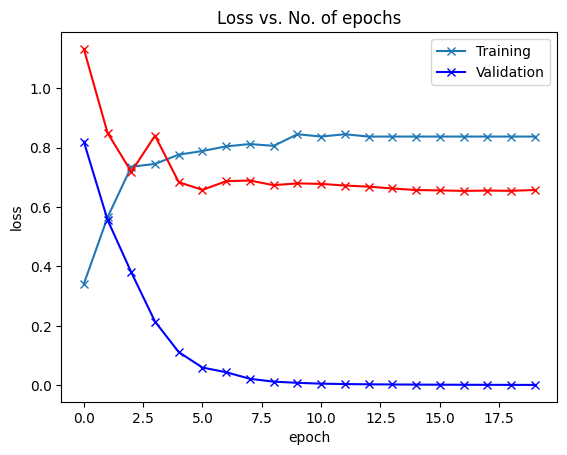

In [40]:
#accuracy vs loss graph of training
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');


plot_accuracies(history)

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

In [28]:
# import gc

# model.cpu()
# del model,
# gc.collect()
# torch.cuda.empty_cache()

In [85]:
# Save the trained model
model_path = 'm1.pth'  # Specify the path where you want to save the model

torch.save(model,model_path)

print(f'Model saved to {model_path}')


Model saved to m1.pth


## Section 2 style tranfer section

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from torchvision.models import vgg19, VGG19_Weights

import copy

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

In [233]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no GPU

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = image.resize((512,512))
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader("/content/test3.jpg")
content_img = image_loader("/content/test5.jpg")
print(style_img.shape,content_img.shape)
assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])


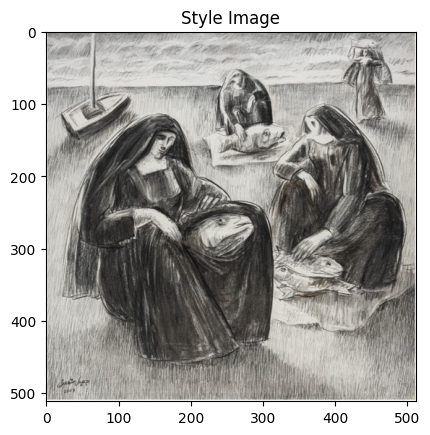

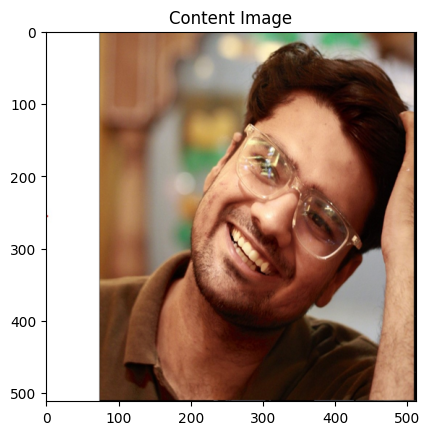

In [234]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [46]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        # we 'detach' the target content from the tree used
        # to dynamically compute the gradient: this is a stated value,
        # not a variable. Otherwise the forward method of the criterion
        # will throw an error.
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

In [216]:
def gram_matrix(input):

    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)
    # print(a,b,c,d)
    features = input.view(a * b, c * d)  # resize F_XL into \hat F_XL
    # print(features.shape,features.t().shape)
    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    # print(input.shape)
    return G.div(a * b * c * d)

In [217]:
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        # print(input.shape,"enter")
        G = gram_matrix(input)
        # print(G.shape,self.target.shape)
        self.loss = F.mse_loss(G, self.target)
        # print(self.loss,input.shape)
        return input

In [ ]:
print(torch.load("/content/m1.pt"))

In [78]:
model = SimpleCNN()
loaded_data=torch.load("/content/m1.pt")
# Check for mismatched keys (optional)
if any(key.startswith('module.') for key in loaded_data.keys()):
    loaded_data = {key[7:]: val for key, val in loaded_data.items()}

In [86]:
cnn=torch.load("/content/m1.pth")

In [129]:
cnn.eval()

AttributeError: ignored

In [169]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406])
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225])

# create a module to normalize input image so we can easily put it in a
# ``nn.Sequential``
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # normalize ``img``
        return (img - self.mean) / self.std

In [168]:
def get_features(cnn,layer_num,x):
  # Define a method to extract features from a specific layer
  # Here, 'layer_num' represents the layer from which you want to extract features
  features = None
  for layers in cnn.children():
      for idx, layer in enumerate(layers):
        # print(idx)

        x = layer(x)
        # print(x.shape,idx,layer_num)
        if idx == layer_num:
            # print("kjsfbksbibkskcwkcbkscjhsbchSJbciSbciSbchSc")
            features = x
            break
  return features

In [245]:
from ast import Pass
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_3']
style_layers_default = ['conv_0', 'conv_1', 'conv_2', 'conv_3', 'conv_4','conv_5','conv_6','conv_7',]

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # normalization module
    normalization = Normalization(normalization_mean, normalization_std)

    # just in order to have an iterable access to or list of content/style
    # losses
    content_losses = []
    style_losses = []

    # assuming that ``cnn`` is a ``nn.Sequential``, so we make a new ``nn.Sequential``
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization).to(device)
    # print("here1")
    i = 0 # increment every time we see a conv
    for layers in cnn.children():
      for layer in layers:
        if isinstance(layer, nn.Conv2d):

            name = 'conv_{}'.format(i)

            # print(name)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ``ContentLoss``
            # and ``StyleLoss`` we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:continue

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            # print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
            target=model(content_img).detach()#get_features(cnn,int(name.split("_")[-1]),content_img).detach()
            # target = model(content_img).detach()
            # print(target,"<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            # print(name.split("_")[-1])
            target_feature=model(style_img).detach()#get_features(cnn,int(name.split("_")[-1]),style_img).detach()
            # print(target_feature.shape,"target loss")
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)
            i += 1

    # now we trim off the layers after the last content and style losses
    # print("here1")
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

In [92]:
def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.LBFGS([input_img])
    return optimizer

In [229]:
def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=500,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)

    # We want to optimize the input and not the model parameters so we
    # update all the requires_grad fields accordingly
    # print("here",model)
    input_img.requires_grad_(True)
    # We also put the model in evaluation mode, so that specific layers
    # such as dropout or batch normalization layers behave correctly.
    model.eval()
    model.requires_grad_(False)


    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # correct the values of updated input image
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            # print("enter",input_img.shape)
            model(input_img)
            # print("exit")
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # a last correction...
    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

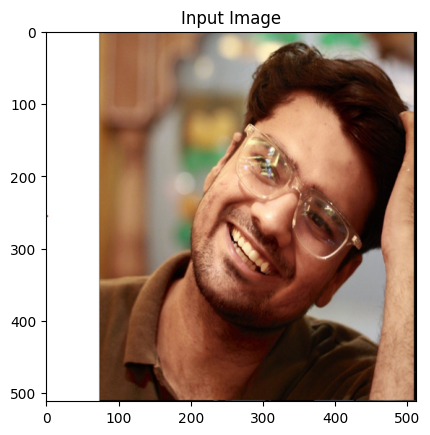

In [243]:
input_img = content_img.clone()

plt.figure()
imshow(input_img, title='Input Image')

### below cells are the some examples of image and style transfer

Building the style transfer model..
here1
here
Optimizing..
run [50]:
Style Loss : 49.659233 Content Loss: 32.721634

run [100]:
Style Loss : 15.465785 Content Loss: 27.744167

run [150]:
Style Loss : 6.315614 Content Loss: 24.950819

run [200]:
Style Loss : 4.283078 Content Loss: 22.795776

run [250]:
Style Loss : 3.283274 Content Loss: 21.273623

run [300]:
Style Loss : 2.641480 Content Loss: 20.113960



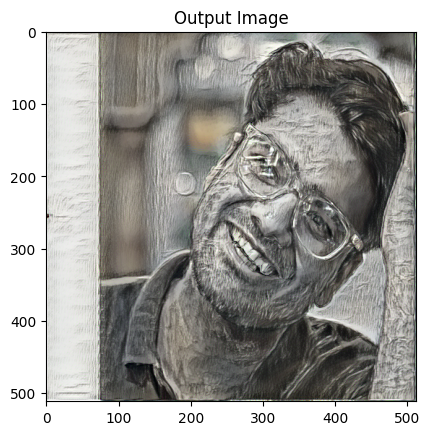

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 6.934390 Content Loss: 2.922879

run [100]:
Style Loss : 6.135237 Content Loss: 2.932932

run [150]:
Style Loss : 5.446621 Content Loss: 2.924416

run [200]:
Style Loss : 4.879767 Content Loss: 2.903966

run [250]:
Style Loss : 4.365719 Content Loss: 2.887689

run [300]:
Style Loss : 3.913304 Content Loss: 2.868380

run [350]:
Style Loss : 3.524845 Content Loss: 2.847225

run [400]:
Style Loss : 3.179503 Content Loss: 2.830627

run [450]:
Style Loss : 2.866574 Content Loss: 2.815147

run [500]:
Style Loss : 2.615247 Content Loss: 2.799025



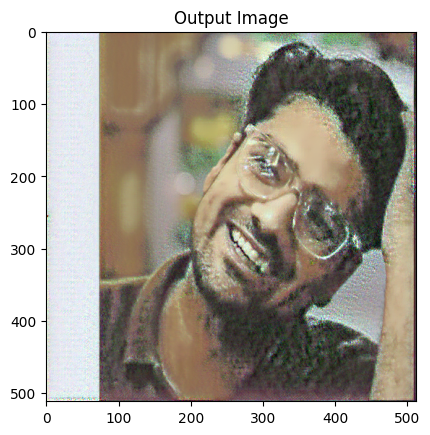

In [246]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

Building the style transfer model..
here1
here
Optimizing..
run [50]:
Style Loss : 317.648529 Content Loss: 90.044418

run [100]:
Style Loss : 174.212021 Content Loss: 88.258492

run [150]:
Style Loss : 113.312134 Content Loss: 84.864868

run [200]:
Style Loss : 70.607315 Content Loss: 82.059090

run [250]:
Style Loss : 37.398312 Content Loss: 79.917831

run [300]:
Style Loss : 19.082262 Content Loss: 77.968246



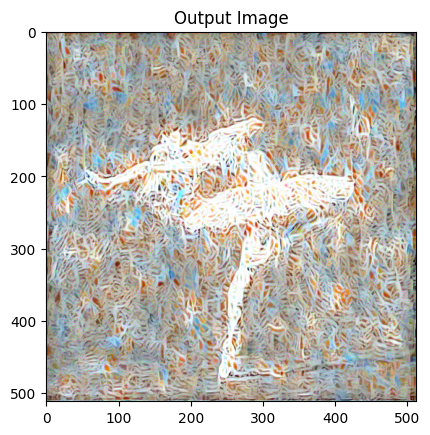

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()